<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [1]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [2]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    """Devuelve a*c usando for y append."""
    out = []
    append = out.append
    for i in a:
        append(i*c)
    return out


def p1_comp(a: np.ndarray, c: float):
    """Devuelve a*c usando list comprehension."""
    return [x*c for x in a]


def p1_gen(a: np.ndarray, c: float):
    """Devuelve (como generador) a*c usando yield o gen expr."""
    return (x*c for x in a)
    


def p1_np(a: np.ndarray, c: float):
    """Devuelve a*c usando NumPy vectorizado."""
    return a*c



## Comprobación de resultados

In [3]:
a = np.arange(5,dtype=float)
c = 2.0

assert np.allclose(np.array(p1_for(a, c)), a * c)
assert np.allclose(np.array(p1_comp(a, c)), a * c)
assert np.allclose(np.array(list(p1_gen(a, c))), a * c)
assert np.allclose(p1_np(a, c), a * c)

(np.array(p1_for(a,c)),
 np.array(p1_for(a,c)).shape,
 np.array(p1_comp(a, c)),
 np.array(p1_comp(a, c)).shape,
 np.array(list(p1_gen(a, c))),
 np.array(list(p1_gen(a, c))).shape,
 p1_np(a,c),p1_np(a,c).shape)


(array([0., 2., 4., 6., 8.]),
 (5,),
 array([0., 2., 4., 6., 8.]),
 (5,),
 array([0., 2., 4., 6., 8.]),
 (5,),
 array([0., 2., 4., 6., 8.]),
 (5,))

In [4]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

time_p1()  # descomenta para probar


(0.07286872500003483,
 0.06152946899999279,
 0.05394363400000657,
 0.00016931999994085345)

## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [5]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    """Devuelve suma de vecinos (1D) con for. Manejo de bordes a tu elección."""
    out = []
    append = out.append
    radius = k // 2
    n = len(a)
    
    for i in range(n):
        window_sum = 0.0
        for offset in range(-radius, radius + 1):
            idx = i + offset
            if 0 <= idx < n:
                window_sum += a[idx]
        append(window_sum)
    
    return out


def p2_comp(a: np.ndarray, k: int = 3):
    """List comprehension."""
    r = k//2
    return [sum(a[max(0,i-r):min(len(a),i+r+1)]) for i in range(len(a))]


def p2_gen(a: np.ndarray, k: int = 3):
    """Generator (yield o gen expr)."""
    r = k//2
    return (sum(a[max(0, i - r):min(len(a), i + r + 1)]) 
            for i in range(len(a)))


def p2_np(a: np.ndarray, k: int = 3):
    """NumPy vectorizado (slicing/roll/convolución simple)."""
    kernel = np.ones(k)
    return np.convolve(a, kernel, mode='same')


Política de tratamiento de ventanas: Se cortan las ventanas en caso de que el radio sobrepase al indice por la izquierda o por la derecha. Para la convolusión, se utiliza el algoritmo builtin de np.

# Comprobación de resultados

In [6]:
a = np.arange(6)
# [0,1,2,3,4,5]
k = 3

assert p2_for(a,k) == p2_comp(a,k) == list(p2_gen(a,k)) == list(p2_np(a,k))
(p2_for(a,k),
 p2_comp(a,k),
 list(p2_gen(a,k)),
 p2_np(a,k))


([np.float64(1.0),
  np.float64(3.0),
  np.float64(6.0),
  np.float64(9.0),
  np.float64(12.0),
  np.float64(9.0)],
 [np.int64(1),
  np.int64(3),
  np.int64(6),
  np.int64(9),
  np.int64(12),
  np.int64(9)],
 [np.int64(1),
  np.int64(3),
  np.int64(6),
  np.int64(9),
  np.int64(12),
  np.int64(9)],
 array([ 1.,  3.,  6.,  9., 12.,  9.]))

In [7]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

time_p2()  # descomenta para probar


(0.17107982899995022,
 0.32412940500000786,
 0.32645118000004913,
 0.00023767400000451744)

## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [8]:
# P3 — Stubs (completa las funciones)
def transformacion(x:float) -> float:
    return np.sin(x) + x**2

def p3_for(a: np.ndarray, umbral: float):
    """Filtra tras transformación no lineal con for."""
    out = []
    append = out.append
    for x in a:
        val = transformacion(x)
        if val > umbral:
            append(val)
    return out



def p3_comp(a: np.ndarray, umbral: float):
    """List comprehension."""
    return [transformacion(x) for x in a if transformacion(x) > umbral]


def p3_gen(a: np.ndarray, umbral: float):
    """Generator (yield o gen expr)."""
    return (transformacion(x) for x in a if transformacion(x) > umbral)


def p3_np(a: np.ndarray, umbral: float):
    """NumPy vectorizado (ufuncs + máscara booleana)."""
    transformado = transformacion(a)
    mask = transformado > umbral
    return transformado[mask]


# Comprobación de resultados

In [9]:
n = 5
a = np.linspace(0,1000,n)
umbral = 10.0

assert np.allclose(np.array(p3_for(a,umbral)),p3_np(a,umbral))
assert np.allclose(np.array(p3_comp(a,umbral)),p3_np(a,umbral))
assert np.allclose(list(p3_gen(a,umbral)),p3_np(a,umbral))

(p3_for(a,umbral),p3_comp(a,umbral),list(p3_gen(a,umbral)),
 p3_np(a,umbral))

([np.float64(62499.02947198046),
  np.float64(249999.53222819467),
  np.float64(562500.7450729503),
  np.float64(1000000.8268795406)],
 [np.float64(62499.02947198046),
  np.float64(249999.53222819467),
  np.float64(562500.7450729503),
  np.float64(1000000.8268795406)],
 [np.float64(62499.02947198046),
  np.float64(249999.53222819467),
  np.float64(562500.7450729503),
  np.float64(1000000.8268795406)],
 array([  62499.02947198,  249999.53222819,  562500.74507295,
        1000000.82687954]))

In [10]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )

time_p3()  # descomenta para probar


(0.45263295800009473,
 0.8252975370000968,
 0.8454738979999092,
 0.015961458999981915)

## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


## Guardado de datos
---

### Dependencias

In [11]:
import json
import os
from datetime import datetime
import platform
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd

### Encoders y decoders
---

In [12]:
class NumpyEncoder(json.JSONEncoder):
    """
    Encoder personalizado que serializa ndarray y np.generic a JSON.
    Preserva dtype y shape para reconstrucción exacta.
    """
    def default(self, o):
        if isinstance(o, np.ndarray):
            return {
                "__ndarray__": True,
                "dtype": str(o.dtype),
                "shape": o.shape,
                "data": o.tolist(),
            }
        if isinstance(o, np.generic):  # np.int64, np.float32, etc.
            return o.item()
        if isinstance(o, (np.floating, np.integer)):
            return o.item()
        return super().default(o)

def numpy_object_hook(d):
    """
    Hook para reconstruir ndarray desde JSON con dtype y shape originales.
    """
    if isinstance(d, dict) and d.get("__ndarray__"):
        arr = np.array(d["data"], dtype=np.dtype(d["dtype"]))
        return arr.reshape(d["shape"])
    return d


### Metadata
---

In [13]:
def crear_metadata():
    """Crea el diccionario de metadata del experimento."""
    return {
        "timestamp": datetime.now().isoformat(),
        "python_version": sys.version.split()[0],
        "numpy_version": np.__version__,
        "machine": platform.machine(),
        "platform": platform.platform(),
        "processor": platform.processor()
    }

### Experimentos
---

In [14]:
def ejecutar_experimentos_multiples(n_values=[1000, 10000, 100000], 
                                   number_repetitions=5,
                                   runs_per_config=10):
    """
    Ejecuta múltiples experimentos con diferentes tamaños n.
    
    Args:
        n_values: Lista de tamaños n a probar
        number_repetitions: Número de repeticiones por timeit
        runs_per_config: Cuántas veces ejecutar cada configuración
    
    Returns:
        dict: Resultados estructurados para guardar en JSON
    """
    metadata = crear_metadata()
    resultados = {
        "metadata": metadata,
        "params": {
            "n_values": n_values,
            "number_repetitions": number_repetitions,
            "runs_per_config": runs_per_config
        },
        "results": {}
    }
    
    for n in n_values:
        print(f"\n=== Ejecutando experimentos para n={n} ===")
        resultados["results"][str(n)] = {}
        
        # Problema 1
        print(f"  P1...")
        p1_times = {"for": [], "comp": [], "gen": [], "numpy": []}
        for run in range(runs_per_config):
            times = time_p1(n=n, number=number_repetitions)
            p1_times["for"].append(times[0] / number_repetitions)
            p1_times["comp"].append(times[1] / number_repetitions)
            p1_times["gen"].append(times[2] / number_repetitions)
            p1_times["numpy"].append(times[3] / number_repetitions)
        
        resultados["results"][str(n)]["p1"] = {
            estrategia: {
                "s_per_call_median": float(np.median(times)),
                "s_per_call_mean": float(np.mean(times)),
                "s_per_call_std": float(np.std(times)),
                "s_per_call_p25": float(np.percentile(times, 25)),
                "s_per_call_p75": float(np.percentile(times, 75)),
                "raw_times": [float(t) for t in times],
                "repetitions": number_repetitions,
                "runs": runs_per_config
            }
            for estrategia, times in p1_times.items()
        }
        
        # Problema 2
        print(f"  P2...")
        p2_times = {"for": [], "comp": [], "gen": [], "numpy": []}
        for run in range(runs_per_config):
            times = time_p2(n=n, number=number_repetitions)
            p2_times["for"].append(times[0] / number_repetitions)
            p2_times["comp"].append(times[1] / number_repetitions)
            p2_times["gen"].append(times[2] / number_repetitions)
            p2_times["numpy"].append(times[3] / number_repetitions)
        
        resultados["results"][str(n)]["p2"] = {
            estrategia: {
                "s_per_call_median": float(np.median(times)),
                "s_per_call_mean": float(np.mean(times)),
                "s_per_call_std": float(np.std(times)),
                "s_per_call_p25": float(np.percentile(times, 25)),
                "s_per_call_p75": float(np.percentile(times, 75)),
                "raw_times": [float(t) for t in times],
                "repetitions": number_repetitions,
                "runs": runs_per_config
            }
            for estrategia, times in p2_times.items()
        }
        
        # Problema 3
        print(f"  P3...")
        p3_times = {"for": [], "comp": [], "gen": [], "numpy": []}
        for run in range(runs_per_config):
            times = time_p3(n=n, number=number_repetitions)
            p3_times["for"].append(times[0] / number_repetitions)
            p3_times["comp"].append(times[1] / number_repetitions)
            p3_times["gen"].append(times[2] / number_repetitions)
            p3_times["numpy"].append(times[3] / number_repetitions)
        
        resultados["results"][str(n)]["p3"] = {
            estrategia: {
                "s_per_call_median": float(np.median(times)),
                "s_per_call_mean": float(np.mean(times)),
                "s_per_call_std": float(np.std(times)),
                "s_per_call_p25": float(np.percentile(times, 25)),
                "s_per_call_p75": float(np.percentile(times, 75)),
                "raw_times": [float(t) for t in times],
                "repetitions": number_repetitions,
                "runs": runs_per_config
            }
            for estrategia, times in p3_times.items()
        }
    
    return resultados


### Guardado de datos
---

In [15]:
def guardar_resultados_json(resultados, output_dir="results/tiempos"):
    """
    Guarda los resultados en un archivo JSON con timestamp.
    Usa NumpyEncoder para serializar correctamente tipos NumPy.
    
    Args:
        resultados: dict con los resultados del experimento
        output_dir: directorio donde guardar el archivo
    
    Returns:
        str: path del archivo guardado
    """
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    n_values = resultados["params"]["n_values"]
    n_str = "_".join(map(str, n_values))
    filename = f"tiempos_p123_n{n_str}_{timestamp}.json"
    filepath = os.path.join(output_dir, filename)
    
    # Guardar con indent para legibilidad y NumpyEncoder para tipos NumPy
    with open(filepath, 'w', encoding='utf-8') as f:
        json.dump(resultados, f, cls=NumpyEncoder, indent=2, 
                 ensure_ascii=False, sort_keys=True)
    
    print(f"\nResultados guardados en: {filepath}")
    print(f"   Tamaño del archivo: {os.path.getsize(filepath) / 1024:.2f} KB")
    
    return filepath

def cargar_resultados_json(filepath):
    """
    Carga resultados desde un archivo JSON.
    Usa numpy_object_hook para reconstruir tipos NumPy si están presentes.
    """
    with open(filepath, 'r', encoding='utf-8') as f:
        return json.load(f, object_hook=numpy_object_hook)


### Dataframe
---

In [16]:
def resultados_a_dataframe(resultados):
    """
    Convierte resultados JSON a DataFrame en formato largo para Seaborn.
    
    Returns:
        pandas.DataFrame con columnas: problema, estrategia, n, s_per_call, etc.
    """   
    filas = []
    for n_str, problemas in resultados["results"].items():
        n = int(n_str)
        for problema, estrategias in problemas.items():
            for estrategia, stats in estrategias.items():
                # Agregar fila con estadísticas agregadas
                fila_base = {
                    "problema": problema,
                    "estrategia": estrategia,
                    "n": n,
                    "s_per_call_median": stats["s_per_call_median"],
                    "s_per_call_mean": stats["s_per_call_mean"],
                    "s_per_call_std": stats["s_per_call_std"],
                    "s_per_call_p25": stats["s_per_call_p25"],
                    "s_per_call_p75": stats["s_per_call_p75"],
                    "ns_per_element": stats["s_per_call_median"] * 1e9 / n
                }
                filas.append(fila_base)
                
                # También agregar filas individuales por run
                for i, tiempo in enumerate(stats["raw_times"]):
                    fila_individual = {
                        "problema": problema,
                        "estrategia": estrategia,
                        "n": n,
                        "run": i,
                        "s_per_call": tiempo,
                        "ns_per_element": tiempo * 1e9 / n
                    }
                    filas.append(fila_individual)
    
    return pd.DataFrame(filas)


### Warm ups
---

In [17]:
def warm_ups(nums=[1000,10000,10000], warmup_runs=2):
    for n in nums:
        for _ in range(warmup_runs):
                time_p1(n=n, number=1)
                time_p2(n=n, number=1)
                time_p3(n=n, number=1)

In [18]:
warm_ups()

### Ejecutar código de experimentos
---

In [19]:
def configurar_estilo():
    """Configura el estilo global para todas las figuras."""
    sns.set_theme(style="whitegrid", palette="deep")
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['font.size'] = 10

In [20]:
def ejecutar_analisis_completo(n_values=[1000, 10000, 100000],
                               number_repetitions=5,
                               runs_per_config=10):
    """
    Ejecuta el análisis completo: experimentos, guardado y visualizaciones.
    
    Uso:
        ejecutar_analisis_completo()
    """  
    # 1. Ejecutar experimentos
    resultados = ejecutar_experimentos_multiples(
        n_values=n_values,
        number_repetitions=number_repetitions,
        runs_per_config=runs_per_config
    )
    
    # 2. Guardar JSON
    filepath = guardar_resultados_json(resultados)
    
    print("\nConvirtiendo a formato largo...")
    df = resultados_a_dataframe(resultados)
    print(f"  DataFrame creado: {len(df)} filas")

    return resultados, df
    

In [21]:
resultados, df = ejecutar_analisis_completo(
    n_values=[1000, 10000],
    number_repetitions=3,
    runs_per_config=5
)


=== Ejecutando experimentos para n=1000 ===
  P1...
  P2...
  P3...

=== Ejecutando experimentos para n=10000 ===
  P1...
  P2...
  P3...

Resultados guardados en: results/tiempos/tiempos_p123_n1000_10000_2025-11-01_16-30-38.json
   Tamaño del archivo: 13.34 KB

Convirtiendo a formato largo...
  DataFrame creado: 144 filas


In [22]:
df.describe()

,n,s_per_call_median,s_per_call_mean,s_per_call_std,s_per_call_p25,s_per_call_p75,ns_per_element,run,s_per_call
count,144.000000,24.000000,24.000000,24.000000,24.000000,24.000000,144.000000,120.000000,120.000000
mean,5500.000000,0.002946,0.002953,0.000054,0.002918,0.002970,572.310703,2.000000,0.002953
std,4515.706854,0.004639,0.004642,0.000068,0.004626,0.004642,602.917868,1.420143,0.004564
min,1000.000000,0.000008,0.000009,0.000002,0.000005,0.000011,0.593467,0.000000,0.000004
25%,1000.000000,0.000071,0.000072,0.000004,0.000071,0.000074,55.619108,1.000000,0.000072
50%,5500.000000,0.000751,0.000764,0.000033,0.000736,0.000760,256.001267,2.000000,0.000745
75%,10000.000000,0.002333,0.002397,0.000079,0.002273,0.002402,1125.525558,3.000000,0.002796
max,10000.000000,0.014064,0.014043,0.000289,0.013992,0.014069,2270.250333,4.000000,0.014136


### Funciones de gráficas
---

In [23]:
def grafico_escalamiento(df, output_dir="results/tiempos/figuras"):
    """3. Curvas de escalamiento (tiempo vs n)."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    df_agg = df[df['s_per_call_median'].notna()].copy()
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    problemas = ['p1', 'p2', 'p3']
    orden_estrategias = ['for', 'comp', 'gen', 'numpy']
    colores = {'for': 'C0', 'comp': 'C1', 'gen': 'C2', 'numpy': 'C3'}
    
    for idx, problema in enumerate(problemas):
        ax = axes[idx]
        df_prob = df_agg[df_agg['problema'] == problema]
        
        for estrategia in orden_estrategias:
            df_est = df_prob[df_prob['estrategia'] == estrategia].sort_values('n')
            ax.plot(df_est['n'], df_est['s_per_call_median'], 
                   marker='o', label=estrategia, color=colores[estrategia],
                   linewidth=2, markersize=8)
            ax.fill_between(df_est['n'], 
                           df_est['s_per_call_p25'],
                           df_est['s_per_call_p75'],
                           alpha=0.2, color=colores[estrategia])
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('n (tamaño de datos)')
        ax.set_ylabel('Tiempo (s_por_llamada_mediana)')
        ax.set_title(f'{problema.upper()} - Escalamiento')
        ax.legend(loc='best')
        ax.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.suptitle('Curvas de Escalamiento - Tiempo vs Tamaño de Datos', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    filepath = os.path.join(output_dir, "03_escalamiento.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Guardado: {filepath}")



In [24]:

def grafico_eficiencia(df, output_dir="results/tiempos/figuras"):
    """4. Eficiencia por elemento (ns/elemento vs n)."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    df_agg = df[df['s_per_call_median'].notna()].copy()
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    problemas = ['p1', 'p2', 'p3']
    orden_estrategias = ['for', 'comp', 'gen', 'numpy']
    colores = {'for': 'C0', 'comp': 'C1', 'gen': 'C2', 'numpy': 'C3'}
    
    for idx, problema in enumerate(problemas):
        ax = axes[idx]
        df_prob = df_agg[df_agg['problema'] == problema]
        
        for estrategia in orden_estrategias:
            df_est = df_prob[df_prob['estrategia'] == estrategia].sort_values('n')
            ax.plot(df_est['n'], df_est['ns_per_element'], 
                   marker='o', label=estrategia, color=colores[estrategia],
                   linewidth=2, markersize=8)
        
        ax.set_xscale('log')
        ax.set_xlabel('n (tamaño de datos)')
        ax.set_ylabel('Tiempo por elemento (ns)')
        ax.set_title(f'{problema.upper()} - Eficiencia por Elemento')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.suptitle('Eficiencia por Elemento - Nanosegundos por Operación', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    filepath = os.path.join(output_dir, "04_eficiencia.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Guardado: {filepath}")


In [25]:


def grafico_heatmap_razones(df, output_dir="results/tiempos/figuras"):
    """5. Heatmap de razones respecto a NumPy."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    df_agg = df[df['s_per_call_median'].notna()].copy()
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    problemas = ['p1', 'p2', 'p3']
    estrategias = ['for', 'comp', 'gen']
    
    for idx, problema in enumerate(problemas):
        ax = axes[idx]
        df_prob = df_agg[df_agg['problema'] == problema]
        
        # Crear matriz de razones
        n_values = sorted(df_prob['n'].unique())
        matriz = np.zeros((len(estrategias), len(n_values)))
        
        for i, estrategia in enumerate(estrategias):
            for j, n in enumerate(n_values):
                tiempo_est = df_prob[(df_prob['estrategia'] == estrategia) & 
                                    (df_prob['n'] == n)]['s_per_call_median'].values[0]
                tiempo_np = df_prob[(df_prob['estrategia'] == 'numpy') & 
                                   (df_prob['n'] == n)]['s_per_call_median'].values[0]
                matriz[i, j] = tiempo_est / tiempo_np
        
        sns.heatmap(matriz, annot=True, fmt='.1f', cmap='RdYlGn_r',
                   xticklabels=[f'{n:,}' for n in n_values],
                   yticklabels=estrategias, ax=ax, 
                   cbar_kws={'label': 'Razón vs NumPy'})
        ax.set_title(f'{problema.upper()} - Razón vs NumPy\n(valores >1 = más lento)')
        ax.set_xlabel('n')
        ax.set_ylabel('Estrategia')
    
    plt.suptitle('Factores de Ralentización Respecto a NumPy', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    filepath = os.path.join(output_dir, "05_heatmap_razones.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Guardado: {filepath}")



In [26]:
def grafico_barras_agrupadas(df, output_dir="results/tiempos/figuras"):
    """1. Gráfico de barras agrupadas por problema y por n."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Filtrar solo filas con estadísticas agregadas
    df_agg = df[df['s_per_call_median'].notna()].copy()
    if df_agg.empty:
        print("No hay datos válidos para graficar.")
        return
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    problemas = ['p1', 'p2', 'p3']
    orden_estrategias = ['for', 'comp', 'gen', 'numpy']
    
    # Paleta de colores para distintos n
    colores = sns.color_palette("viridis", as_cmap=False, n_colors=len(df_agg['n'].unique()))
    ns = sorted(df_agg['n'].unique())
    
    for idx, problema in enumerate(problemas):
        ax = axes[idx]
        df_prob = df_agg[df_agg['problema'] == problema]
        if df_prob.empty:
            ax.set_title(f'{problema.upper()} - sin datos')
            continue
        
        width = 0.15  # ancho de cada barra
        x = np.arange(len(orden_estrategias))
        
        for j, n_val in enumerate(ns):
            df_plot = df_prob[df_prob['n'] == n_val]
            if df_plot.empty:
                continue
            
            medians, p25, p75 = [], [], []
            for e in orden_estrategias:
                row = df_plot[df_plot['estrategia'] == e]
                if row.empty:
                    medians.append(np.nan)
                    p25.append(np.nan)
                    p75.append(np.nan)
                else:
                    medians.append(row['s_per_call_median'].values[0])
                    p25.append(row['s_per_call_p25'].values[0])
                    p75.append(row['s_per_call_p75'].values[0])
            
            yerr_lower = [m - p for m, p in zip(medians, p25)]
            yerr_upper = [p - m for p, m in zip(p75, medians)]
            yerr = [yerr_lower, yerr_upper]
            
            # Desplazamiento horizontal según el índice de n
            offset = (j - (len(ns)-1)/2) * width
            bars = ax.bar(x + offset, medians, width=width, 
                          yerr=yerr, capsize=3, alpha=0.8, 
                          label=f"n={n_val:,}", color=colores[j])
        
        ax.set_xticks(x)
        ax.set_xticklabels(orden_estrategias)
        ax.set_yscale('log')
        ax.set_ylabel('Tiempo (s)')
        ax.set_title(f'{problema.upper()}')
        ax.grid(True, alpha=0.3, which='both', axis='y')
        ax.legend(title='Tamaño n', fontsize=8, title_fontsize=9)
    
    plt.suptitle('Comparación de Tiempos por Estrategia, Problema y Tamaño n',
                 fontsize=14, y=1.02)
    plt.tight_layout()
    
    filepath = os.path.join(output_dir, "01_barras_agrupadas_todas_n.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Guardado: {filepath}")


In [27]:
def grafico_boxplots(df, output_dir="results/tiempos/figuras", n=None):
    """2. Boxplots de variabilidad."""
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Filtrar solo runs individuales
    df_runs = df[df['run'].notna()].copy()
    if df_runs.empty:
        print("No hay datos válidos para graficar.")
        return
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    problemas = ['p1', 'p2', 'p3']
    orden_estrategias = ['for', 'comp', 'gen', 'numpy']
    
    for idx, problema in enumerate(problemas):
        ax = axes[idx]
        df_prob = df_runs[df_runs['problema'] == problema]
        if df_prob.empty:
            ax.set_title(f'{problema.upper()} - sin datos')
            continue
        
        # Usar n especificado o el máximo disponible
        if n is None or n not in df_prob['n'].unique():
            n_max = df_prob['n'].max()
            print(f"n={n} no encontrado para {problema}, usando n_max={n_max}")
        else:
            n_max = n
        
        df_plot = df_prob[df_prob['n'] == n_max]
        if df_plot.empty:
            ax.set_title(f'{problema.upper()} - sin datos (n={n_max})')
            continue
        
        sns.boxplot(data=df_plot, x='estrategia', y='s_per_call', 
                    order=orden_estrategias, ax=ax)
        sns.stripplot(data=df_plot, x='estrategia', y='s_per_call',
                      order=orden_estrategias, color='black', alpha=0.3, 
                      size=3, ax=ax)
        
        ax.set_yscale('log')
        ax.set_ylabel('Tiempo (s)')
        ax.set_xlabel('Estrategia')
        ax.set_title(f'{problema.upper()} - Variabilidad (n={n_max:,})')
        ax.grid(True, alpha=0.3, which='both', axis='y')
    
    plt.suptitle('Distribución de Tiempos - Análisis de Variabilidad', 
                 fontsize=14, y=1.02)
    plt.tight_layout()
    filepath = os.path.join(output_dir, f"02_boxplots_n{n or 'max'}.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Guardado: {filepath}")


### Gráficos    
---

### Resultados:
* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`? (Gráfica de barras y Heatmap)
    - La estrategia más rápida en general es numpy. Para las otras estrategias el tiempo amunetaba mientras que aumentaba n, para numpy, aumento n y disminuyo el tiempo.
    - La razón de rápidez es de aproximadamente 10 veces respecto a las otras    estrategias para el problema 1 cuando `n=1000`.El valor máximo de razón es 79.6 para el problema 2 para la list comp en ambos casos. Cuando `n=10000` la máxima razón llega a crecer hasta a 528.7 (razón entre segundos por llamada (mediana))
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*? (Boxplot)
    - La estrategia que mostro menor dispersión para datos más grandes fue el for.
    - Se presentaron outliers para todas las estrategias, y numpy fue el que mostro más dispersión.
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?(Escalamiento)
    - Mientras crecia el número de elementos, el tiempo también creció, pero no sucedió lo mismo para numpy (fue al contrario).
* ¿Qué recomendación práctica harías según el problema?
    - Numpy es buena estrategia cuando se trata de operaciones pesadas y grandes datasets.
    - El list comp es bueno para legibilida y espacio de código. Es un poco más lento que el for en este caso.
    - El generado es bueno para cuando hay limitaciones en memoria, en general cuando son datos en streaming.
    - El for es buena opción cuando la lógica es más compleja y no son operaciones vectorizables.


#### Barras agrupadas
---

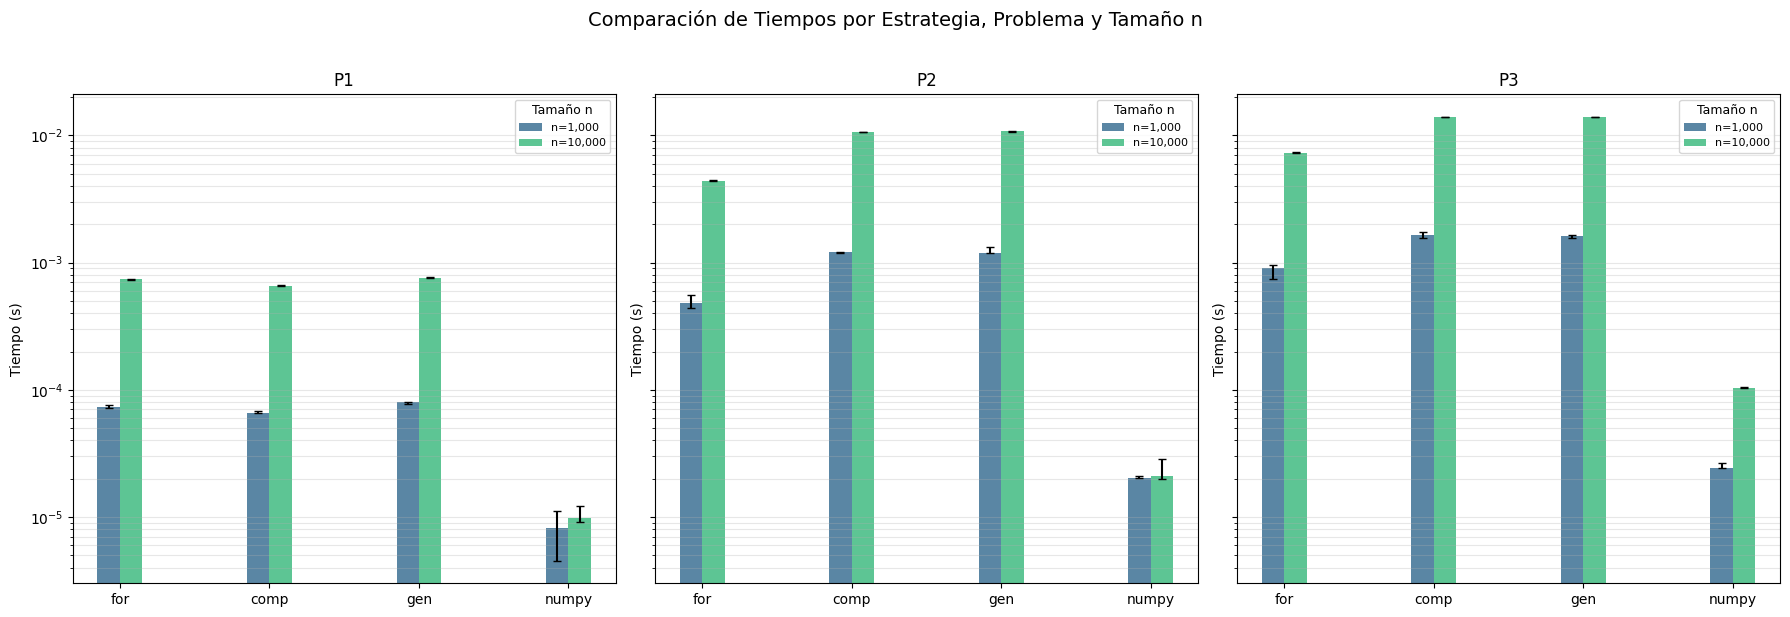

Guardado: results/tiempos/figuras/01_barras_agrupadas_todas_n.png


In [28]:
grafico_barras_agrupadas(df)

#### Boxplot
---

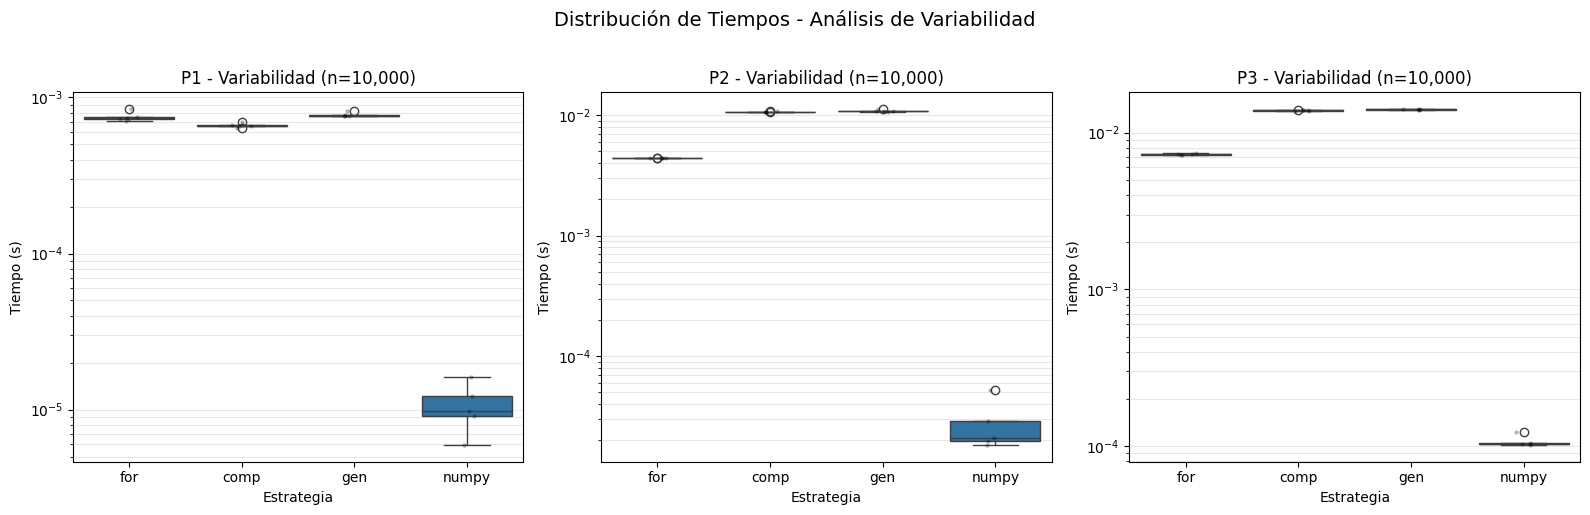

Guardado: results/tiempos/figuras/02_boxplots_n10000.png


In [29]:
grafico_boxplots(df,n=10000)

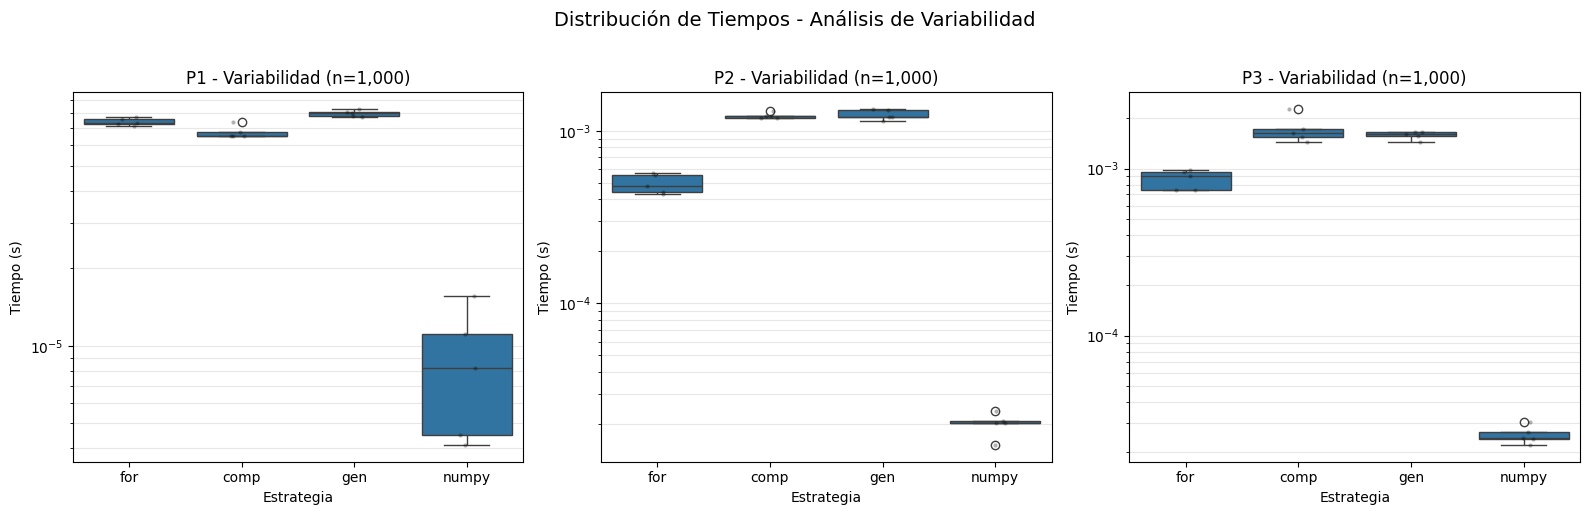

Guardado: results/tiempos/figuras/02_boxplots_n1000.png


In [30]:
grafico_boxplots(df,n=1000)

#### Heatmap
---

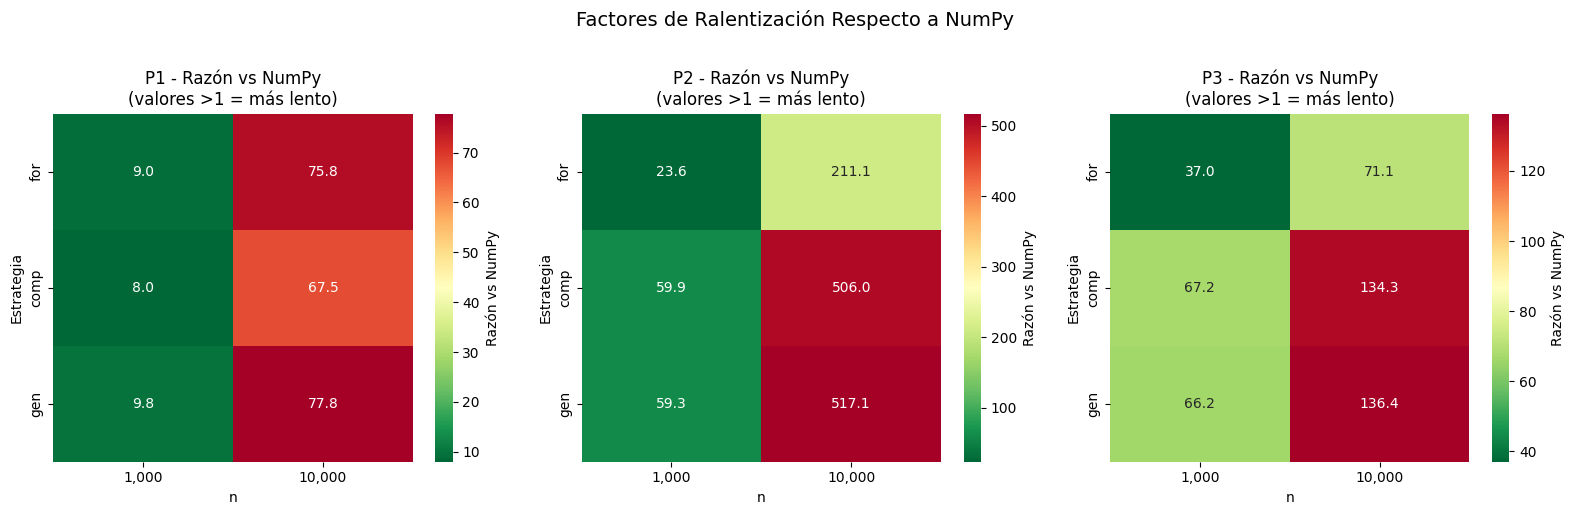

Guardado: results/tiempos/figuras/05_heatmap_razones.png


In [31]:
grafico_heatmap_razones(df)

#### Escalamiento
---

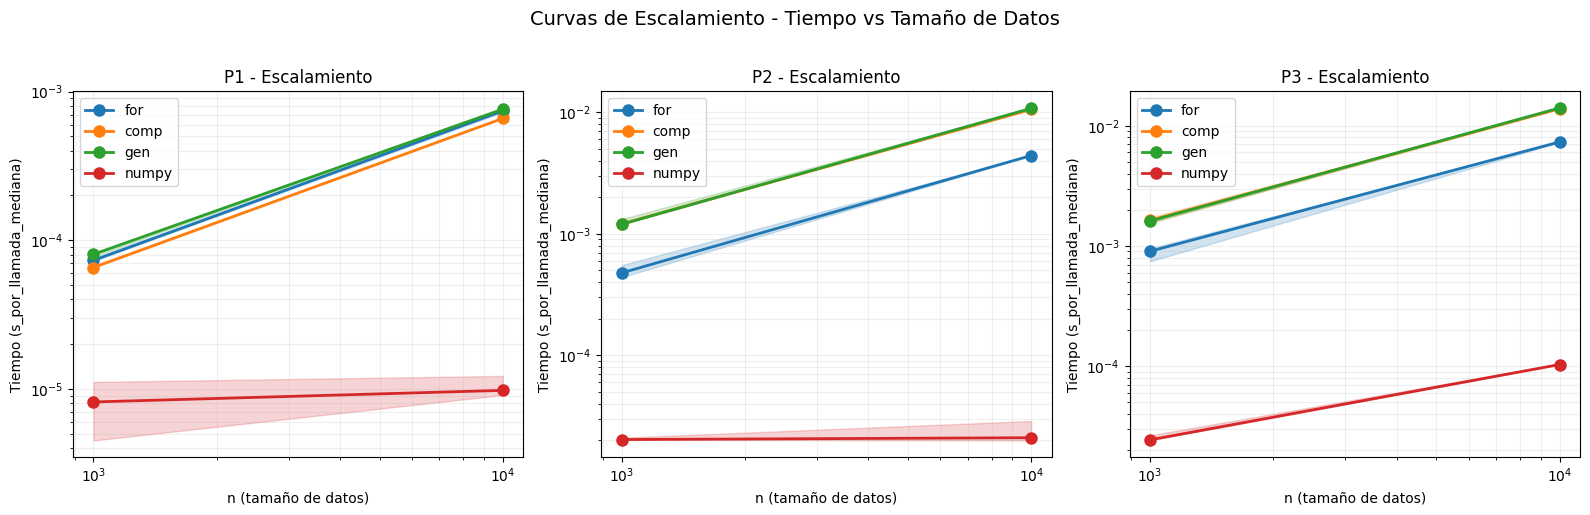

Guardado: results/tiempos/figuras/03_escalamiento.png


In [32]:
grafico_escalamiento(df)